In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas

# Example: Tallying Bishop's (The Big Sort) landslide counties by year:

In [11]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/county_election_data_2000-2016.csv'
county_election_df = pd.read_csv(url,dtype={'FIPS':str})
county_election_df.head()

,FIPS,gop_2000_votes,dem_2000_votes,totalvotes_2000,gop_2000_prc,dem_2000_prc,gop_minus_dem_prc_2000,gop_2004_votes,dem_2004_votes,totalvotes_2004,...,totalvotes_2012,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016
0,01001,11993.0,4942.0,17208.0,69.69,28.72,40.97,15196.0,4758.0,20081.0,...,23932.0,72.62,26.59,46.03,18172.0,5936.0,24973.0,72.77,23.77,49.00
1,01003,40872.0,13997.0,56480.0,72.37,24.78,47.59,52971.0,15599.0,69320.0,...,85338.0,77.36,21.59,55.77,72883.0,18458.0,95215.0,76.55,19.39,57.16
2,01005,5096.0,5188.0,10395.0,49.02,49.91,-0.89,5899.0,4832.0,10777.0,...,11509.0,48.22,51.37,-3.15,5454.0,4871.0,10469.0,52.10,46.53,5.57
3,01007,4273.0,2710.0,7101.0,60.17,38.16,22.01,5472.0,2089.0,7600.0,...,8420.0,72.83,26.15,46.68,6738.0,1874.0,8819.0,76.40,21.25,55.15
4,01009,12667.0,4977.0,17973.0,70.48,27.69,42.79,17386.0,3938.0,21504.0,...,24006.0,86.47,12.37,74.10,22859.0,2156.0,25588.0,89.33,8.43,80.90


In [12]:
# We can easily subset the dataset looking for particular columns

which_cols = county_election_df.columns.str.contains('minus')
df = county_election_df.loc[:,which_cols]

In [13]:
# What percent of counties have become landslide counties (those where the victory margin was 20% or more) 
# in the county record?

100*np.sum(np.abs(df) > 20)/len(df)

gop_minus_dem_prc_2000    51.299937
gop_minus_dem_prc_2004    59.670260
gop_minus_dem_prc_2008    55.263158
gop_minus_dem_prc_2012    63.792010
gop_minus_dem_prc_2016    77.362080
dtype: float64

# Example: Joining to a geographic data set:

In [34]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/county_election_data_2000-2016.csv'
county_election_df = pd.read_csv(url,dtype={'FIPS':str})

url = 'https://github.com/thomaspingel/geodata/blob/master/cartographic_boundary_files/cb_2016_us_county_20m.gpkg'
cb_data = geopandas.read_file(url)

DriverError: '/vsimem/0e2fe3c232a943139bb216d5d214ac0c' not recognized as a supported file format.

In [28]:
election_gdf = cb_data.merge(county_election_df,left_on='GEOID',right_on='FIPS',how='left')

c:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


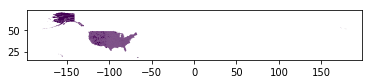

In [29]:
election_gdf.plot(column='gop_minus_dem_prc_2016')

In [27]:
'02' in (cb_data.STATEFP.unique())

True

In [32]:
np.any(county_election_df['FIPS'].str.startswith('02'))

True